In [1]:
library("survival")
library("arrow")
library("tidyverse")
library("feather")
library("survminer")
library("ggplot2")
library("tableone")
library("ggfortify")


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘feather’


The following objects are masked from ‘package:arrow’:

    read_feather, write_feather


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [2]:
tx_df <-read_parquet("/home/project/data/students/srtr/tx_cohort.parquet")
head(tx_df)

CAN_ABO,CAN_ANGINA,REC_DGN,CAN_DIAB_TY,CAN_GENDER,CAN_HGT_CM,CAN_MALIG,CAN_RACE,CAN_WGT_KG,DONOR_ID,⋯,REC_PREV_GRAFT1_DT,REC_GRAFT_STAT,REC_HGT_WGT_DT,REC_PROD_URINE_GT40_24HRS,REC_TX_DT,TFL_DEATH_DT,TFL_GRAFT_DT,TFL_LAFUDATE,TX_ID,TFL_COD
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,⋯,<dttm>,<chr>,<dttm>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<dbl>
B,NA,3070,3,M,170.20,N,16,63.500,421873,⋯,NA,Y,NA,Y,2012-12-20 01:00:00,NA,2018-12-27 01:00:00,2018-12-27 01:00:00,1590873,NA
A,NA,3034,1,M,180.34,N,8,88.900,421665,⋯,NA,Y,NA,Y,2013-01-22 01:00:00,NA,NA,2021-01-23 01:00:00,1593148,NA
O,NA,3040,1,M,180.00,N,8,86.680,420796,⋯,NA,Y,NA,Y,2012-11-26 01:00:00,NA,2017-10-12 02:00:00,2017-11-16 01:00:00,1588938,NA
O,NA,3070,3,M,172.00,N,2000,86.000,421449,⋯,NA,Y,NA,NA,2012-12-07 01:00:00,2021-06-17 02:00:00,NA,2021-06-17 02:00:00,1589878,3500
B,NA,3001,1,F,157.48,N,16,56.699,421690,⋯,NA,Y,NA,Y,2013-02-13 01:00:00,NA,NA,2021-02-04 01:00:00,1594745,NA
A,NA,3006,1,M,177.80,N,8,71.670,422794,⋯,NA,Y,NA,NA,2013-01-01 01:00:00,NA,NA,2020-10-24 02:00:00,1591556,NA


In [3]:
colnames(tx_df)

[1] "CAN_ABO"                        "CAN_ANGINA"                    
 [3] "REC_DGN"                        "CAN_DIAB_TY"                   
 [5] "CAN_GENDER"                     "CAN_HGT_CM"                    
 [7] "CAN_MALIG"                      "CAN_RACE"                      
 [9] "CAN_WGT_KG"                     "DONOR_ID"                      
[11] "DON_ABO"                        "DON_AGE"                       
[13] "DON_AGE_IN_MONTHS"              "DON_GENDER"                    
[15] "REC_ACUTE_REJ_BIOPSY_CONFIRMED" "REC_ACUTE_REJ_EPISODE"         
[17] "REC_AGE_AT_TX"                  "REC_AGE_IN_MONTHS_AT_TX"       
[19] "REC_A_MM_EQUIV_CUR"             "REC_A_MM_EQUIV_TX"             
[21] "REC_BMI"                        "REC_B_MM_EQUIV_CUR"            
[23] "REC_B_MM_EQUIV_TX"              "REC_DR_MM_EQUIV_CUR"           
[25] "REC_DR_MM_EQUIV_TX"             "REC_MM_EQUIV_CUR"              
[27] "REC_MM_EQUIV_TX"                "REC_COD"                       
[29] "REC_COD2"                       "REC_COD3"                      
[31] "REC_COLD_ISCH_TM"               "REC_CREAT"                     
[33] "REC_CREAT_DECLINE_GE25"         "REC_DISCHRG_CREAT"             
[35] "REC_DIAL_DT"                    "REC_DISCHRG_DT"                
[37] "REC_FAIL_DT"                    "REC_FAIL_CAUSE_TY"             
[39] "REC_PREV_GRAFT1_DT"             "REC_GRAFT_STAT"                
[41] "REC_HGT_WGT_DT"                 "REC_PROD_URINE_GT40_24HRS"     
[43] "REC_TX_DT"                      "TFL_DEATH_DT"                  
[45] "TFL_GRAFT_DT"                   "TFL_LAFUDATE"                  
[47] "TX_ID"                          "TFL_COD"

In [4]:
# take columnnames suggested by nephrologist and clinical reasoning and removing multiple mismatch parameter to only get the overall mismatch percentage because of obious multicolinearity
tx_df <- tx_df %>% select(-c('CAN_HGT_CM','CAN_WGT_KG','DONOR_ID','DON_AGE_IN_MONTHS','REC_AGE_IN_MONTHS_AT_TX','REC_AGE_IN_MONTHS_AT_TX','REC_FAIL_DT','REC_FAIL_CAUSE_TY','REC_PREV_GRAFT1_DT','REC_GRAFT_STAT','REC_HGT_WGT_DT',
                             'TX_ID','TFL_COD','REC_COD','REC_COD2','REC_COD3','TFL_COD', 'CAN_RACE','REC_A_MM_EQUIV_CUR','REC_A_MM_EQUIV_TX','REC_BMI','REC_B_MM_EQUIV_CUR','REC_B_MM_EQUIV_TX','REC_DR_MM_EQUIV_CUR',
                             'REC_DR_MM_EQUIV_TX'))

In [5]:
colnames(tx_df)

[1] "CAN_ABO"                        "CAN_ANGINA"                    
 [3] "REC_DGN"                        "CAN_DIAB_TY"                   
 [5] "CAN_GENDER"                     "CAN_MALIG"                     
 [7] "DON_ABO"                        "DON_AGE"                       
 [9] "DON_GENDER"                     "REC_ACUTE_REJ_BIOPSY_CONFIRMED"
[11] "REC_ACUTE_REJ_EPISODE"          "REC_AGE_AT_TX"                 
[13] "REC_MM_EQUIV_CUR"               "REC_MM_EQUIV_TX"               
[15] "REC_COLD_ISCH_TM"               "REC_CREAT"                     
[17] "REC_CREAT_DECLINE_GE25"         "REC_DISCHRG_CREAT"             
[19] "REC_DIAL_DT"                    "REC_DISCHRG_DT"                
[21] "REC_PROD_URINE_GT40_24HRS"      "REC_TX_DT"                     
[23] "TFL_DEATH_DT"                   "TFL_GRAFT_DT"                  
[25] "TFL_LAFUDATE"

In [6]:
data <- tx_df%>%mutate(time = case_when(
  !is.na(TFL_DEATH_DT) & is.na(TFL_GRAFT_DT)~ difftime( TFL_DEATH_DT,REC_TX_DT, units = "days"),
    is.na(TFL_DEATH_DT) & !is.na(TFL_GRAFT_DT)~ difftime(TFL_GRAFT_DT,REC_TX_DT,  units = "days"),
    is.na(TFL_DEATH_DT) & is.na(TFL_GRAFT_DT)~ difftime(TFL_LAFUDATE,REC_TX_DT,  units = "days"),
  ))

# time: Survival time in days
# status: censoring status 1=censored, 2=graft failure
data$status <- 1
data$status[!is.na(data$TFL_DEATH_DT)]<-1
data$status[!is.na(data$TFL_GRAFT_DT)]<-2

In [7]:
colSums(is.na(data))
# drop columns with too much missing data
data <- data %>% select(-c('CAN_ANGINA', 'REC_ACUTE_REJ_BIOPSY_CONFIRMED','REC_CREAT_DECLINE_GE25','REC_PROD_URINE_GT40_24HRS'))

CAN_ABO                     CAN_ANGINA 
                             0                         365430 
                       REC_DGN                    CAN_DIAB_TY 
                          4061                          72073 
                    CAN_GENDER                      CAN_MALIG 
                             0                          72439 
                       DON_ABO                        DON_AGE 
                             9                             21 
                    DON_GENDER REC_ACUTE_REJ_BIOPSY_CONFIRMED 
                             1                         506772 
         REC_ACUTE_REJ_EPISODE                  REC_AGE_AT_TX 
                        192470                              1 
              REC_MM_EQUIV_CUR                REC_MM_EQUIV_TX 
                          5697                          40261 
              REC_COLD_ISCH_TM                      REC_CREAT 
                         49004                         122028 
        REC_CREAT_DECLINE_GE25              REC_DISCHRG_CREAT 
                        286905                          12929 
                   REC_DIAL_DT                 REC_DISCHRG_DT 
                         91128                           5885 
     REC_PROD_URINE_GT40_24HRS                      REC_TX_DT 
                        286047                              0 
                  TFL_DEATH_DT                   TFL_GRAFT_DT 
                        395034                         390251 
                  TFL_LAFUDATE                           time 
                             0                          23978 
                        status 
                             0

In [8]:
data$yeartx <- format(data$REC_TX_DT, format="%Y")
min(data$yeartx)

[1] "1987"

In [9]:
data$decade <- '80'
data$decade[data$yeartx>1989]<-'90'
data$decade[data$yeartx>1999]<- '2000'
data$decade[data$yeartx>2009]<- '2010'
data$decade[data$yeartx>2019]<- '2020'
data$decade <- as.factor(data$decade)

data <- data %>% select(-c("REC_DIAL_DT", "REC_DISCHRG_DT", "REC_TX_DT","yeartx"))
unique(data$decade)

[1] 2010 2000 90   80   2020
Levels: 2000 2010 2020 80 90

In [10]:
colSums(is.na(data))

CAN_ABO               REC_DGN           CAN_DIAB_TY 
                    0                  4061                 72073 
           CAN_GENDER             CAN_MALIG               DON_ABO 
                    0                 72439                     9 
              DON_AGE            DON_GENDER REC_ACUTE_REJ_EPISODE 
                   21                     1                192470 
        REC_AGE_AT_TX      REC_MM_EQUIV_CUR       REC_MM_EQUIV_TX 
                    1                  5697                 40261 
     REC_COLD_ISCH_TM             REC_CREAT     REC_DISCHRG_CREAT 
                49004                122028                 12929 
         TFL_DEATH_DT          TFL_GRAFT_DT          TFL_LAFUDATE 
               395034                390251                     0 
                 time                status                decade 
                23978                     0                     0

In [11]:
data <- data %>% select(-c('TFL_DEATH_DT','TFL_GRAFT_DT','TFL_LAFUDATE' ))

In [12]:
head(data)

CAN_ABO,REC_DGN,CAN_DIAB_TY,CAN_GENDER,CAN_MALIG,DON_ABO,DON_AGE,DON_GENDER,REC_ACUTE_REJ_EPISODE,REC_AGE_AT_TX,REC_MM_EQUIV_CUR,REC_MM_EQUIV_TX,REC_COLD_ISCH_TM,REC_CREAT,REC_DISCHRG_CREAT,time,status,decade
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<drtn>,<dbl>,<fct>
B,3070,3,M,N,B,45,F,3,68,5,5,6.18,7.33,1.96,2198 days,2,2010
A,3034,1,M,N,A,48,M,3,69,3,3,1.00,4.60,1.00,2923 days,1,2010
O,3040,1,M,N,O,28,F,3,59,5,5,11.30,3.70,3.80,1781 days,2,2010
O,3070,3,M,N,O,54,F,3,59,6,6,12.78,8.25,3.17,3114 days,1,2010
B,3001,1,F,N,B,57,F,3,59,6,6,0.92,6.54,0.98,2913 days,1,2010
A,3006,1,M,N,A1,47,M,3,35,5,5,14.95,10.30,5.90,2853 days,1,2010


Pick timeframe

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 23978 rows containing non-finite values (stat_bin).”


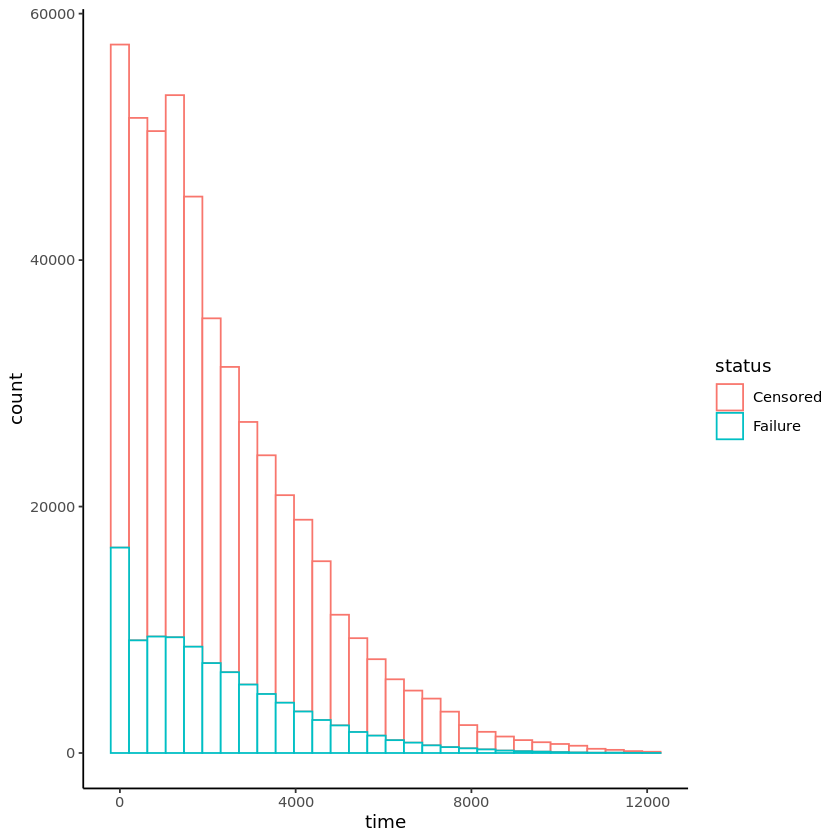

In [13]:
plotting <- data
plotting$time <- as.integer(plotting$time)
plotting$status <- as.character(plotting$status)
plotting$status[plotting$status==1]<- "Censored"
plotting$status[plotting$status==2]<- "Failure"
plotting$status <- as.factor(plotting$status)


ggplot(plotting, aes(x=time, color=status)) +
    geom_histogram(fill="white")+
    theme_classic()

In [14]:
# first 13 years after tx
data <- subset(data, data$time <4745)

Cleaning and refactoring

In [15]:
str(data)

tibble [428,314 × 18] (S3: tbl_df/tbl/data.frame)
 $ CAN_ABO              : chr [1:428314] "B" "A" "O" "O" ...
 $ REC_DGN              : num [1:428314] 3070 3034 3040 3070 3001 ...
 $ CAN_DIAB_TY          : num [1:428314] 3 1 1 3 1 1 1 1 1 3 ...
 $ CAN_GENDER           : chr [1:428314] "M" "M" "M" "M" ...
 $ CAN_MALIG            : chr [1:428314] "N" "N" "N" "N" ...
 $ DON_ABO              : chr [1:428314] "B" "A" "O" "O" ...
 $ DON_AGE              : num [1:428314] 45 48 28 54 57 47 12 46 21 14 ...
 $ DON_GENDER           : chr [1:428314] "F" "M" "F" "F" ...
 $ REC_ACUTE_REJ_EPISODE: num [1:428314] 3 3 3 3 3 3 3 3 3 3 ...
 $ REC_AGE_AT_TX        : num [1:428314] 68 69 59 59 59 35 44 46 24 63 ...
 $ REC_MM_EQUIV_CUR     : num [1:428314] 5 3 5 6 6 5 4 3 6 6 ...
 $ REC_MM_EQUIV_TX      : num [1:428314] 5 3 5 6 6 5 4 3 6 6 ...
 $ REC_COLD_ISCH_TM     : num [1:428314] 6.18 1 11.3 12.78 0.92 ...
 $ REC_CREAT            : num [1:428314] 7.33 4.6 3.7 8.25 6.54 10.3 9.6 10.8 2.46 3.3 ...
 $ REC

In [16]:
cols <- c("CAN_ABO","REC_DGN","CAN_DIAB_TY", "CAN_GENDER", "CAN_MALIG", "DON_ABO", "DON_GENDER","REC_ACUTE_REJ_EPISODE", 
         "REC_MM_EQUIV_CUR","REC_MM_EQUIV_TX")
data[cols] <- lapply(data[cols], factor)

str(data)

tibble [428,314 × 18] (S3: tbl_df/tbl/data.frame)
 $ CAN_ABO              : Factor w/ 9 levels "A","A1","A1B",..: 7 1 8 8 7 1 8 8 7 8 ...
 $ REC_DGN              : Factor w/ 77 levels "999","3000","3001",..: 69 36 41 69 3 8 41 10 71 69 ...
 $ CAN_DIAB_TY          : Factor w/ 6 levels "1","2","3","4",..: 3 1 1 3 1 1 1 1 1 3 ...
 $ CAN_GENDER           : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 2 2 1 1 ...
 $ CAN_MALIG            : Factor w/ 3 levels "N","U","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ DON_ABO              : Factor w/ 9 levels "A","A1","A1B",..: 7 1 8 8 7 2 8 8 8 8 ...
 $ DON_AGE              : num [1:428314] 45 48 28 54 57 47 12 46 21 14 ...
 $ DON_GENDER           : Factor w/ 2 levels "F","M": 1 2 1 1 1 2 1 1 2 2 ...
 $ REC_ACUTE_REJ_EPISODE: Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ REC_AGE_AT_TX        : num [1:428314] 68 69 59 59 59 35 44 46 24 63 ...
 $ REC_MM_EQUIV_CUR     : Factor w/ 7 levels "0","1","2","3",..: 6 4 6 7 7 6 5 4 7 7 ...
 $ REC_MM_EQUIV_TX      

In [17]:
## Create a TableOne object
tab1 <- CreateTableOne(vars = c('CAN_ABO','REC_DGN','CAN_DIAB_TY','CAN_GENDER','CAN_MALIG','DON_ABO','DON_AGE','DON_GENDER','REC_AGE_AT_TX','REC_MM_EQUIV_CUR',
            'REC_MM_EQUIV_TX','REC_COLD_ISCH_TM','REC_CREAT','REC_DISCHRG_CREAT',
            'decade','status'), strata = "status", 
                       data = data, factorVars = c('CAN_ABO','REC_DGN','CAN_DIAB_TY','CAN_GENDER','CAN_MALIG','DON_ABO','DON_GENDER','REC_MM_EQUIV_TX','REC_MM_EQUIV_CUR','decade'))

tab3Mat <- print(tab1,showAllLevels = FALSE, quote = FALSE, noSpaces = TRUE, printToggle = FALSE)

write.csv(tab3Mat, 'myTable.csv')

In [18]:
# univariate cox to select variables
# covariates
covariates <- colnames(data)
covariates <- covariates[!covariates %in% c("time","status")]

#making formulas
univ_formulas <- sapply(covariates,function(x)as.formula(paste('Surv(time,status)~',x))
)
#making a list of models
univ_models <- lapply(univ_formulas, function(x){coxph(x,data=data)})

#extract data (here I've gone for HR and confint)
univ_results <- lapply(univ_models,function(x){cbind(exp(cbind(coef(x),confint(x))),Pval=anova(x)[2,4])})

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  75 ; coefficient may be infinite. ”


In [19]:
univ_results

,,2.5 %,97.5 %,Pval
CAN_ABOA1,0.7420987,0.6849502,0.8040153,3.402358e-23
CAN_ABOA1B,0.7800710,0.6092336,0.9988135,3.402358e-23
CAN_ABOA2,0.8096202,0.6777436,0.9671577,3.402358e-23
CAN_ABOA2B,1.2160976,0.8395242,1.7615850,3.402358e-23
CAN_ABOAB,0.9856658,0.9533244,1.0191044,3.402358e-23
CAN_ABOB,1.0411392,1.0190198,1.0637387,3.402358e-23
CAN_ABOO,1.0438824,1.0285315,1.0594624,3.402358e-23
CAN_ABOUNK,0.7312278,0.2358232,2.2673515,3.402358e-23
,,2.5 %,97.5 %,Pval
REC_DGN3000,1.2104913,1.1048505,1.3262329,0


In [20]:
# drop donor gender; all  other significant (p<0.05) and therefore at least independently associated/correlated
data <- data %>% select(-c('DON_GENDER'))
data <- na.omit(data)      
length(data$CAN_ABO)

[1] 271501

In [21]:
# Split in validation and training data, seed for reproducability, choosen randomly

## 80% of the sample size
smp_size <- floor(0.80 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = smp_size)

train <- data[train_ind, ]
test2 <- data[-train_ind, ]

data <- train

In [22]:
str(data)

tibble [217,200 × 17] (S3: tbl_df/tbl/data.frame)
 $ CAN_ABO              : Factor w/ 9 levels "A","A1","A1B",..: 8 1 8 6 7 8 1 1 1 8 ...
 $ REC_DGN              : Factor w/ 77 levels "999","3000","3001",..: 11 36 41 55 41 69 6 6 1 69 ...
 $ CAN_DIAB_TY          : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 3 3 1 1 1 3 ...
 $ CAN_GENDER           : Factor w/ 2 levels "F","M": 2 1 2 2 2 1 2 2 1 2 ...
 $ CAN_MALIG            : Factor w/ 3 levels "N","U","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ DON_ABO              : Factor w/ 9 levels "A","A1","A1B",..: 8 1 8 1 8 8 1 1 1 8 ...
 $ DON_AGE              : num [1:217200] 46 57 44 31 55 53 51 16 57 43 ...
 $ REC_ACUTE_REJ_EPISODE: Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ REC_AGE_AT_TX        : num [1:217200] 57 62 49 70 56 64 31 27 63 60 ...
 $ REC_MM_EQUIV_CUR     : Factor w/ 7 levels "0","1","2","3",..: 5 7 4 6 1 6 5 6 5 5 ...
 $ REC_MM_EQUIV_TX      : Factor w/ 7 levels "0","1","2","3",..: 5 7 4 6 1 6 5 6 5 5 ...
 $ REC_COLD_IS

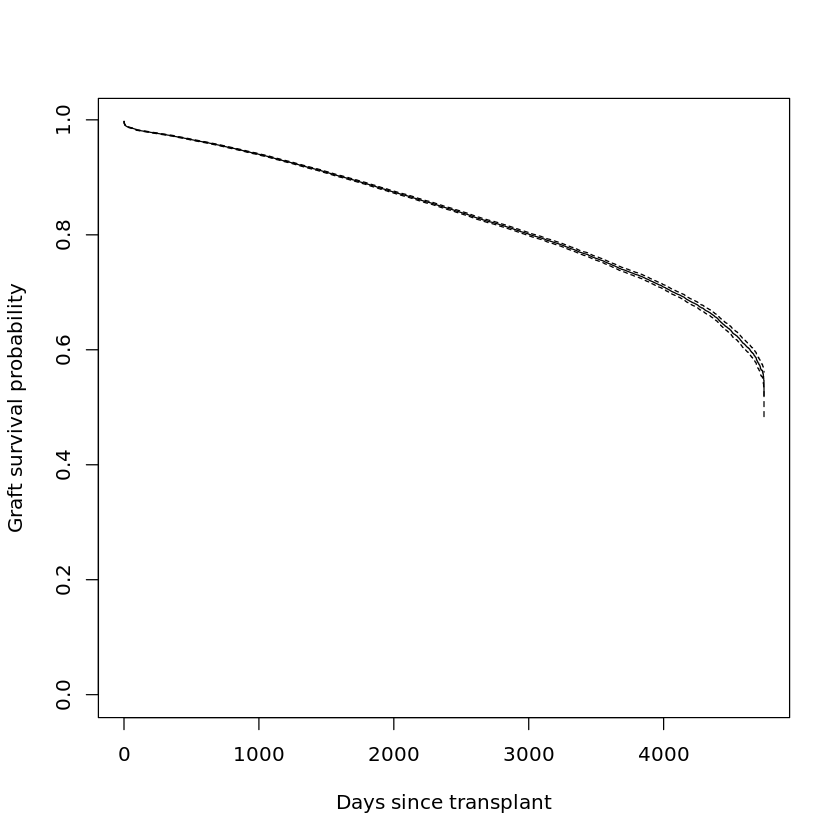

In [23]:
plot(survfit(Surv(time, status) ~ 1, data = data), 
     xlab = "Days since transplant", 
     ylab = "Graft survival probability")

In [24]:
res.cox <- coxph(Surv(time, status) ~ CAN_GENDER+REC_DGN+CAN_ABO+CAN_DIAB_TY+CAN_MALIG+DON_ABO+DON_AGE+
                 REC_AGE_AT_TX+REC_MM_EQUIV_CUR+REC_MM_EQUIV_TX+REC_COLD_ISCH_TM+REC_CREAT+
                 REC_DISCHRG_CREAT+decade, data = data)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  24,39,75,76 ; coefficient may be infinite. ”


....Forum answer: "When I asked Terry Therneau (author of pkg:survival) about that several years ago he said the test that is being triggered to generate that warning is overly sensitive. Generally the warning is not correct. You can usually just look at your coefficients to see that they are not infinite or even effectively infinite which a coefficient of 20 would be unrealistically large in most instances"....
=> Concerning the error message


In [25]:
summary(res.cox)

Call:
coxph(formula = Surv(time, status) ~ CAN_GENDER + REC_DGN + CAN_ABO + 
    CAN_DIAB_TY + CAN_MALIG + DON_ABO + DON_AGE + REC_AGE_AT_TX + 
    REC_MM_EQUIV_CUR + REC_MM_EQUIV_TX + REC_COLD_ISCH_TM + REC_CREAT + 
    REC_DISCHRG_CREAT + decade, data = data)

  n= 217200, number of events= 26627 

                        coef  exp(coef)   se(coef)       z Pr(>|z|)    
CAN_GENDERM       -1.469e-01  8.634e-01  1.326e-02 -11.078  < 2e-16 ***
REC_DGN3000        2.404e-01  1.272e+00  1.068e-01   2.251 0.024407 *  
REC_DGN3001        2.951e-01  1.343e+00  4.973e-02   5.934 2.95e-09 ***
REC_DGN3002        5.005e-01  1.650e+00  1.322e-01   3.785 0.000154 ***
REC_DGN3003        1.682e-01  1.183e+00  2.897e-01   0.581 0.561533    
REC_DGN3004       -1.394e-01  8.699e-01  3.767e-02  -3.700 0.000215 ***
REC_DGN3005        4.678e-01  1.596e+00  1.731e-01   2.702 0.006895 ** 
REC_DGN3006        2.202e-01  1.246e+00  3.044e-02   7.234 4.70e-13 ***
REC_DGN3007        1.156e-01  1.123e+00  5.420e-02

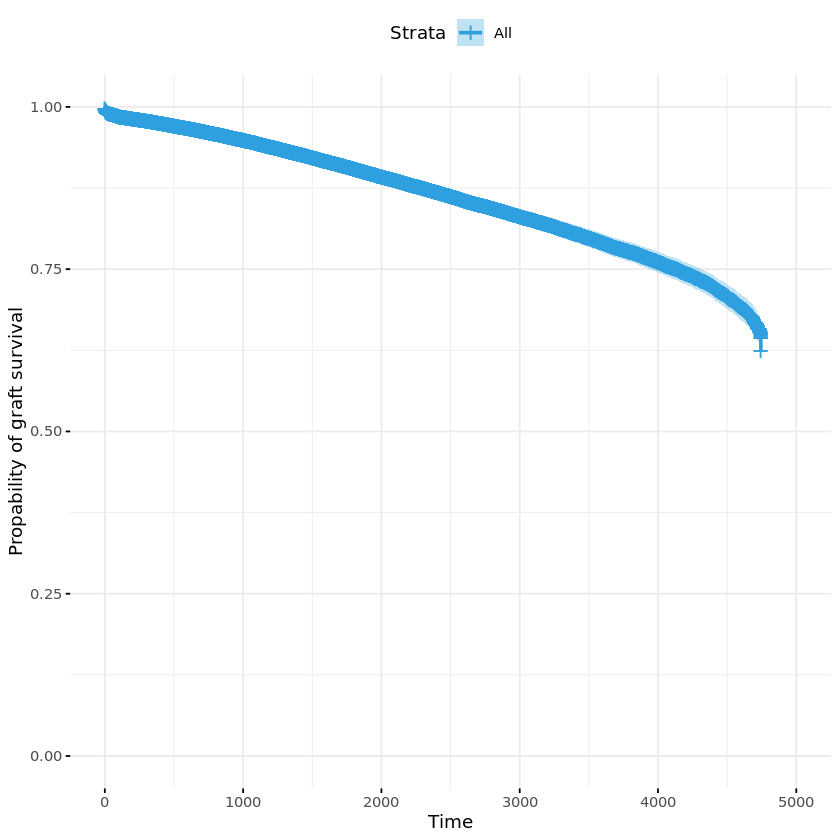

In [26]:
ggsurvplot(survfit(res.cox),data=data, palette = "#2E9FDF",
           ggtheme = theme_minimal(), ylab = c("Propability of graft survival"))

In [27]:
concordance(res.cox, newdata = test2)
concordance(res.cox)
extractAIC(res.cox)
print("AIC:")
extractAIC(res.cox)

Call:
concordance.coxph(object = res.cox, newdata = test2)

n= 54301 
Concordance= 0.6884 se= 0.003679
concordant discordant     tied.x     tied.y    tied.xy 
 128613361   58213738          0      31169          0 

Call:
concordance.coxph(object = res.cox)

n= 217200 
Concordance= 0.6909 se= 0.00182
concordant discordant     tied.x     tied.y    tied.xy 
2098890019  939081001          0     459734          1 

[1]    118.0 595503.1

[1] "AIC:"


[1]    118.0 595503.1

# parametric part

In [28]:
data$time[data$time==0]<-0.00001

In [34]:
s <- Surv(time, status) ~ CAN_GENDER+REC_DGN+CAN_ABO+CAN_DIAB_TY+CAN_MALIG+DON_ABO+DON_AGE+
                 REC_AGE_AT_TX+REC_MM_EQUIV_CUR+REC_MM_EQUIV_TX+REC_COLD_ISCH_TM+REC_CREAT+
                 REC_DISCHRG_CREAT+decade

In [35]:
reg_fit <- coxph(Surv(time, status)~1, data=data)
summary(reg_fit)

# Now get baseline curve
baseline <- basehaz(reg_fit)

Call:  coxph(formula = Surv(time, status) ~ 1, data = data)

Null model
  log likelihood= -303167.3 
  n= 217200 

,hazard,time
,<dbl>,<dbl>
1,0.002793948,1e-05
2,0.005051155,1e+00
3,0.006117918,2e+00
4,0.006755202,3e+00
5,0.007360571,4e+00
6,0.007885727,5e+00


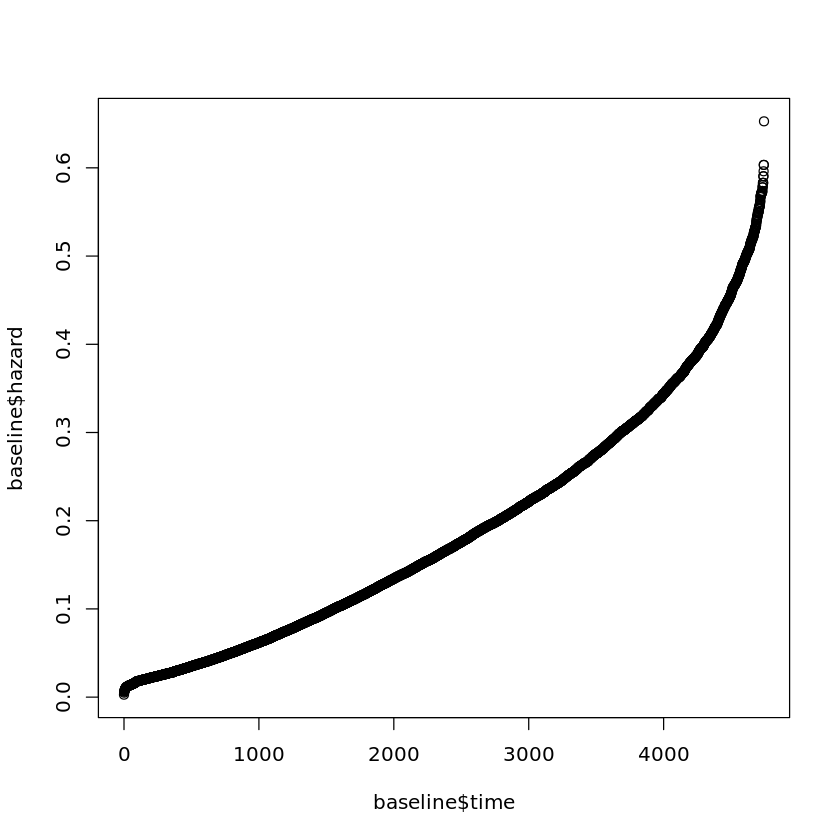

In [36]:
plot(baseline$time, baseline$hazard)
head(baseline)

In [ ]:
fitwb <- survreg(s, data=data, dist = "weibull") 
fitexp <- survreg(s, data = data, dist = "exponential")

fitgaus <- survreg(s, data = data, dist = "gaussian")
fitlog <- survreg(s, data = data, dist = "logistic")

fitlognorm <- survreg(s, data = data, dist = "lognormal")
fitloglog <- survreg(s, data = data, dist = "loglogistic")

In [ ]:
a<-extractAIC(fitwb)
b<-extractAIC(fitexp)
c<-extractAIC(fitgaus)
d<-extractAIC(fitlog)
e<-extractAIC(fitlognorm)
f<-extractAIC(fitloglog)
g <- extractAIC(res.cox)
aicput <- rbind(a,b,c,d,e,f,g)
namemod <- c("Weibull", "Exponential", "Gaussian", "Logistic", "Lognormal", "Loglogistic", "Cox")
aicput <- cbind(aicput, namemod)
aicput


In [ ]:
concordance(fitwb)
concordance(fitwb, newdata = test2)

In [ ]:
concordance(fitloglog)
concordance(fitloglog, newdata =test2)
# summary(fitloglog)

In [ ]:
#anova(fitwb)
summary(fitwb)

In [ ]:
s <- with(data,Surv(time,status))
sWei <- survreg(s ~ as.factor(CAN_GENDER),dist='weibull',data=data)

In [ ]:
sWei

In [ ]:
intercept<-10.1719889
scale<-1.15

#par(mfrow=c(1,2),mar=c(5.1,5.1,4.1,2.1)) # Make room for the hat.
# S(t), the survival function
curve(pweibull(x, scale=exp(intercept), shape=1/scale, lower.tail=FALSE), 
      from=0, to=4000, col='red', lwd=2, ylab='Survival propability', xlab='Days since transplant',bty='n',ylim=c(0,1))
# h(t), the hazard function
curve(dweibull(x, scale=exp(intercept), shape=1/scale)
      /pweibull(x, scale=exp(intercept), shape=1/scale, lower.tail=FALSE), 
      from=0, to=4000, col='blue', lwd=2, ylab=expression(hat(h)(t)), xlab='Days since transplant',bty='n')
par(mfrow=c(1,1),mar=c(5.1,4.1,4.1,2.1))

In [ ]:
plot(survfit(Surv(time, status) ~ 1, data = data), 
     xlab = "Days since transplant", 
     ylab = "Graft survival probability")

curve(pweibull(x, scale=exp(intercept), shape=1/scale, lower.tail=FALSE), 
      from=0, to=6000, col='red', lwd=2, ylab='Survival propability', xlab='Days since transplant',bty='n',ylim=c(0,1), add = TRUE)

legend("bottomleft", 
  legend = c("Kaplan–Meier estimator", "Weibull"), 
  col = c('black','red'), 
  pch = c(17,19), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))